In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

2023-01-17 02:09:15.828880: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN', 'NAME', 'STATUS', 'SPECIAL_CONSIDERATIONS'.
application_df = application_df.drop(["EIN", "NAME","STATUS","SPECIAL_CONSIDERATIONS"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_count = application_df.APPLICATION_TYPE.value_counts()
app_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

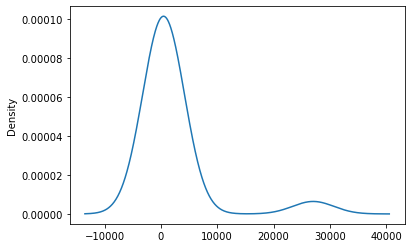

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_count.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_apps = list(app_count[app_count < 500].index)

# Replace in dataframe
for app in replace_apps:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df.CLASSIFICATION.value_counts()
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

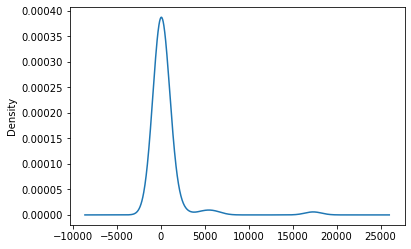

In [8]:
# Visualize the value counts of CLASSIFICATION
class_count.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_count[class_count < 1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Remove special considerations
##application_df.SPECIAL_CONSIDERATIONS.value_counts()

In [11]:
##application_df = application_df.loc[application_df.SPECIAL_CONSIDERATIONS == "N"]
##application_df.SPECIAL_CONSIDERATIONS.value_counts()

In [12]:
##application_df = application_df.drop(["SPECIAL_CONSIDERATIONS"], axis=1)
##application_df.head(10)
## special considerations kept as tests proved to be a necessary variable

In [13]:
# Look at ASK_AMT value counts for binning
ask_count = application_df.ASK_AMT.value_counts()
ask_count

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

<AxesSubplot:ylabel='Density'>

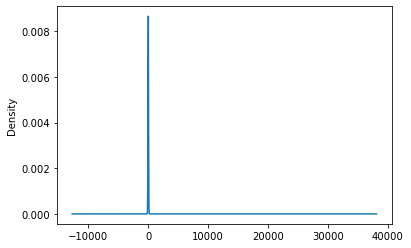

In [14]:
# Visualize the value counts of ASK_AMT
ask_count.plot.density()

In [15]:
# Determine which values to replace if counts are less than ...?
replace_ask = list(ask_count[ask_count < 1000].index)

# Replace in dataframe
for amt in replace_ask:
    if amt <= 49999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("5001-49999"))
    elif amt < 99999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("50000-99999"))
    elif amt < 499999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("100000-499999"))
    elif amt < 999999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("500000-999999"))
    elif amt < 4999999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("1M-5M"))
    else:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("5M+"))
    
application_df.ASK_AMT = application_df.ASK_AMT.astype(str)

# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()

5000             25398
5001-49999        2947
100000-499999     2305
50000-99999       1421
1M-5M              940
500000-999999      651
5M+                637
Name: ASK_AMT, dtype: int64

In [16]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'ASK_AMT']

In [17]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/crystinadang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,ASK_AMT_100000-499999,ASK_AMT_1M-5M,ASK_AMT_5000,ASK_AMT_50000-99999,ASK_AMT_500000-999999,ASK_AMT_5001-49999,ASK_AMT_5M+
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

/var/folders/nv/fp5fj5n155q18dnd926k3vgm0000gn/T/ipykernel_3171/2023052568.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.drop(application_cat,1)


,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,ASK_AMT_100000-499999,ASK_AMT_1M-5M,ASK_AMT_5000,ASK_AMT_50000-99999,ASK_AMT_500000-999999,ASK_AMT_5001-49999,ASK_AMT_5M+
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

/var/folders/nv/fp5fj5n155q18dnd926k3vgm0000gn/T/ipykernel_3171/307776193.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = application_df.drop(["IS_SUCCESSFUL"],1).values


In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


2023-01-17 02:09:30.210192: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 dense (Dense)               (None, 80)                3760      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,221
Trainable params: 6,221
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [24]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4020)

In [25]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5726 - accuracy: 0.7150
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5536 - accuracy: 0.7275
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5506 - accuracy: 0.7293
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5479 - accuracy: 0.7310
Epoch 5/100
794/804 [============================>.] - ETA: 0s - loss: 0.5469 - accuracy: 0.7311
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5474 - accuracy: 0.7306
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5460 - accuracy: 0.7324
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5448 - accuracy: 0.7317
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5441 - accuracy: 0.7329
Epoch 9/100
804/804 [==============================] -

796/804 [============================>.] - ETA: 0s - loss: 0.5253 - accuracy: 0.7433
Epoch 65: saving model to checkpoints/weights.65.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5255 - accuracy: 0.7431
Epoch 66/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5255 - accuracy: 0.7441
Epoch 67/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5254 - accuracy: 0.7455
Epoch 68/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5253 - accuracy: 0.7438
Epoch 69/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5252 - accuracy: 0.7431
Epoch 70/100
800/804 [============================>.] - ETA: 0s - loss: 0.5254 - accuracy: 0.7434
Epoch 70: saving model to checkpoints/weights.70.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5253 - accuracy: 0.7435
Epoch 71/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5248 - accuracy: 0.7438
Epoch 72/100
804/804 

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 5.0663 - accuracy: 0.6224 - 425ms/epoch - 2ms/step
Loss: 5.066303730010986, Accuracy: 0.6223906874656677


<AxesSubplot:>

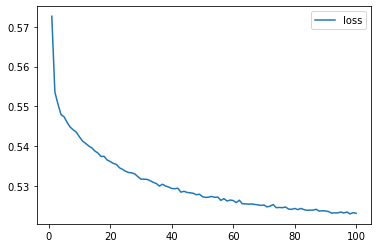

In [27]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

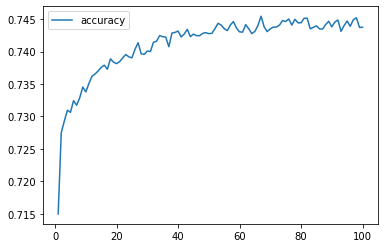

In [28]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [29]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3760      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,511
Trainable params: 6,511
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5729 - accuracy: 0.7175
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5540 - accuracy: 0.7289
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5512 - accuracy: 0.7297
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5488 - accuracy: 0.7309
Epoch 5/100
778/804 [============================>.] - ETA: 0s - loss: 0.5474 - accuracy: 0.7316
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5471 - accuracy: 0.7318
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5459 - accuracy: 0.7331
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5453 - accuracy: 0.7326
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5435 - accuracy: 0.7350
Epoch 9/100
804/804 [==============================] -

803/804 [============================>.] - ETA: 0s - loss: 0.5252 - accuracy: 0.7435
Epoch 65: saving model to checkpoints/weights.65.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5254 - accuracy: 0.7433
Epoch 66/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5259 - accuracy: 0.7438
Epoch 67/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5256 - accuracy: 0.7434
Epoch 68/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5252 - accuracy: 0.7439
Epoch 69/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5257 - accuracy: 0.7439
Epoch 70/100
792/804 [============================>.] - ETA: 0s - loss: 0.5251 - accuracy: 0.7435
Epoch 70: saving model to checkpoints/weights.70.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5251 - accuracy: 0.7436
Epoch 71/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5250 - accuracy: 0.7437
Epoch 72/100
804/804 

In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 4.4011 - accuracy: 0.6470 - 408ms/epoch - 2ms/step
Loss: 4.401102542877197, Accuracy: 0.6469970941543579


<AxesSubplot:>

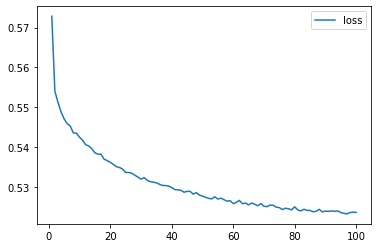

In [33]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

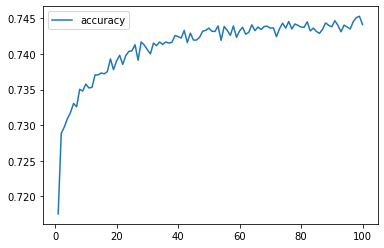

In [34]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [35]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 80)                3760      
                                                                 
 dense_8 (Dense)             (None, 30)                2430      
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,221
Trainable params: 6,221
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5736 - accuracy: 0.7174
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5570 - accuracy: 0.7263
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5545 - accuracy: 0.7277
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5529 - accuracy: 0.7262
Epoch 5/100
790/804 [============================>.] - ETA: 0s - loss: 0.5519 - accuracy: 0.7282
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5523 - accuracy: 0.7279
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5513 - accuracy: 0.7275
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5508 - accuracy: 0.7280
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5502 - accuracy: 0.7287
Epoch 9/100
804/804 [==============================] -

796/804 [============================>.] - ETA: 0s - loss: 0.5356 - accuracy: 0.7380
Epoch 65: saving model to checkpoints/weights.65.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5354 - accuracy: 0.7381
Epoch 66/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5362 - accuracy: 0.7363
Epoch 67/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5356 - accuracy: 0.7404
Epoch 68/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5359 - accuracy: 0.7383
Epoch 69/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5353 - accuracy: 0.7375
Epoch 70/100
790/804 [============================>.] - ETA: 0s - loss: 0.5351 - accuracy: 0.7395
Epoch 70: saving model to checkpoints/weights.70.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5356 - accuracy: 0.7389
Epoch 71/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5356 - accuracy: 0.7381
Epoch 72/100
804/804 

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 1.1973 - accuracy: 0.5549 - 514ms/epoch - 2ms/step
Loss: 1.1973458528518677, Accuracy: 0.5548688173294067


<AxesSubplot:>

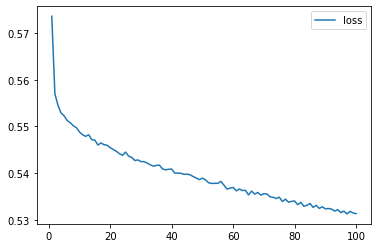

In [39]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

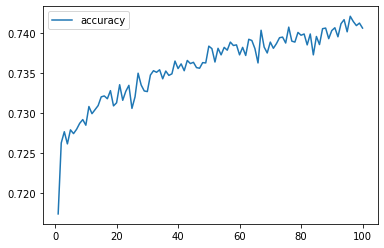

In [40]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [41]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 80)                3760      
                                                                 
 dense_11 (Dense)            (None, 30)                2430      
                                                                 
 dense_12 (Dense)            (None, 1)                 31        
                                                                 
Total params: 6,221
Trainable params: 6,221
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5818 - accuracy: 0.7144
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5640 - accuracy: 0.7249
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5579 - accuracy: 0.7274
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5552 - accuracy: 0.7285
Epoch 5/100
796/804 [============================>.] - ETA: 0s - loss: 0.5537 - accuracy: 0.7281
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5538 - accuracy: 0.7282
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5521 - accuracy: 0.7281
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5512 - accuracy: 0.7292
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5498 - accuracy: 0.7290
Epoch 9/100
804/804 [==============================] -

798/804 [============================>.] - ETA: 0s - loss: 0.5330 - accuracy: 0.7406
Epoch 65: saving model to checkpoints/weights.65.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5330 - accuracy: 0.7407
Epoch 66/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5327 - accuracy: 0.7402
Epoch 67/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5329 - accuracy: 0.7404
Epoch 68/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5323 - accuracy: 0.7411
Epoch 69/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5323 - accuracy: 0.7409
Epoch 70/100
791/804 [============================>.] - ETA: 0s - loss: 0.5334 - accuracy: 0.7405
Epoch 70: saving model to checkpoints/weights.70.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5322 - accuracy: 0.7415
Epoch 71/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5320 - accuracy: 0.7414
Epoch 72/100
804/804 

In [44]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6888 - accuracy: 0.6857 - 336ms/epoch - 1ms/step
Loss: 0.688761830329895, Accuracy: 0.6857143044471741


<AxesSubplot:>

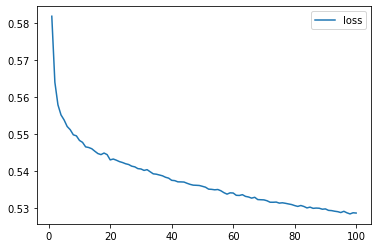

In [45]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

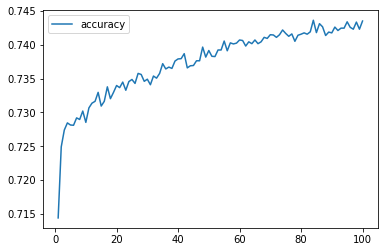

In [46]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [47]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 80


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 120)               5640      
                                                                 
 dense_14 (Dense)            (None, 80)                9680      
                                                                 
 dense_15 (Dense)            (None, 1)                 81        
                                                                 
Total params: 15,401
Trainable params: 15,401
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [49]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5852 - accuracy: 0.7153
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5680 - accuracy: 0.7239
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5604 - accuracy: 0.7251
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5566 - accuracy: 0.7254
Epoch 5/100
794/804 [============================>.] - ETA: 0s - loss: 0.5545 - accuracy: 0.7283
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5541 - accuracy: 0.7284
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5530 - accuracy: 0.7280
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5525 - accuracy: 0.7284
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5509 - accuracy: 0.7280
Epoch 9/100
804/804 [==============================] -

794/804 [============================>.] - ETA: 0s - loss: 0.5327 - accuracy: 0.7400
Epoch 65: saving model to checkpoints/weights.65.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5330 - accuracy: 0.7402
Epoch 66/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5325 - accuracy: 0.7399
Epoch 67/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5323 - accuracy: 0.7398
Epoch 68/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5325 - accuracy: 0.7400
Epoch 69/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5319 - accuracy: 0.7411
Epoch 70/100
793/804 [============================>.] - ETA: 0s - loss: 0.5316 - accuracy: 0.7404
Epoch 70: saving model to checkpoints/weights.70.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5318 - accuracy: 0.7404
Epoch 71/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5315 - accuracy: 0.7411
Epoch 72/100
804/804 

In [50]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6812 - accuracy: 0.6737 - 484ms/epoch - 2ms/step
Loss: 0.6812247633934021, Accuracy: 0.673702597618103


<AxesSubplot:>

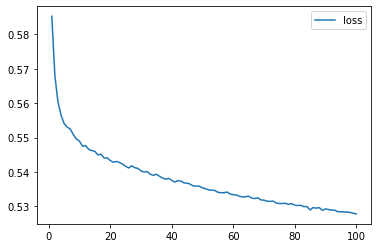

In [51]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

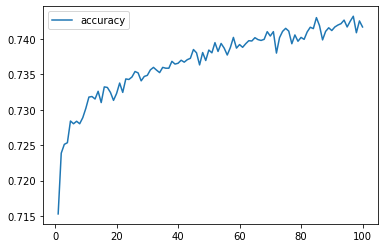

In [52]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [56]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 94
hidden_nodes_layer2 = 40


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 94)                4418      
                                                                 
 dense_20 (Dense)            (None, 40)                3800      
                                                                 
 dense_21 (Dense)            (None, 1)                 41        
                                                                 
Total params: 8,259
Trainable params: 8,259
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [58]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=150, callbacks=[cp_callback])

Epoch 1/150
804/804 [==============================] - 2s 1ms/step - loss: 0.5833 - accuracy: 0.7143
Epoch 2/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5663 - accuracy: 0.7221
Epoch 3/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5586 - accuracy: 0.7251
Epoch 4/150
130/804 [===>..........................] - ETA: 1s - loss: 0.5673 - accuracy: 0.7163
Epoch 4: saving model to checkpoints/weights.04.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5561 - accuracy: 0.7259
Epoch 5/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5540 - accuracy: 0.7270
Epoch 6/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5526 - accuracy: 0.7280
Epoch 7/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5509 - accuracy: 0.7279
Epoch 8/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5506 - accuracy: 0.7299
Epoch 9/150
145/804 [====>.........................] -

804/804 [==============================] - 2s 2ms/step - loss: 0.5329 - accuracy: 0.7409
Epoch 65/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5324 - accuracy: 0.7413
Epoch 66/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5324 - accuracy: 0.7417
Epoch 67/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5323 - accuracy: 0.7419
Epoch 68/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5321 - accuracy: 0.7401
Epoch 69/150
129/804 [===>..........................] - ETA: 1s - loss: 0.5358 - accuracy: 0.7432
Epoch 69: saving model to checkpoints/weights.69.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5318 - accuracy: 0.7423
Epoch 70/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5316 - accuracy: 0.7402
Epoch 71/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5314 - accuracy: 0.7416
Epoch 72/150
804/804 [==============================] - 1s

804/804 [==============================] - 1s 2ms/step - loss: 0.5260 - accuracy: 0.7430
Epoch 128/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5259 - accuracy: 0.7450
Epoch 129/150
134/804 [====>.........................] - ETA: 1s - loss: 0.5252 - accuracy: 0.7425
Epoch 129: saving model to checkpoints/weights.129.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5258 - accuracy: 0.7442
Epoch 130/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5261 - accuracy: 0.7442
Epoch 131/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5260 - accuracy: 0.7428
Epoch 132/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5258 - accuracy: 0.7432
Epoch 133/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5257 - accuracy: 0.7433
Epoch 134/150
135/804 [====>.........................] - ETA: 1s - loss: 0.5224 - accuracy: 0.7500
Epoch 134: saving model to checkpoints/weights.134.hd

In [59]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7472 - accuracy: 0.6238 - 340ms/epoch - 1ms/step
Loss: 0.7471683025360107, Accuracy: 0.6237900853157043


<AxesSubplot:>

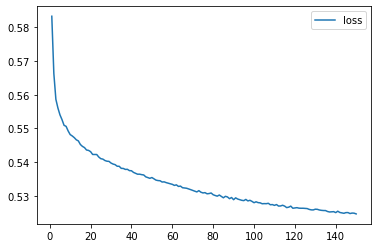

In [60]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

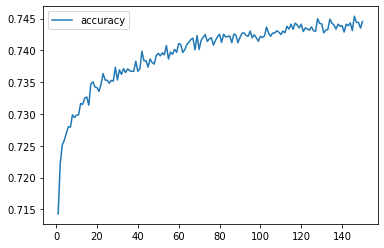

In [61]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [62]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

In [ ]:
# Import the model to a new object
## nn_imported = tf.keras.models.load_model('AlphabetSoupCharity.h5')